# Escalado
Conjunto de datos: iris (incluido en sklearn)
Este conjunto de datos es compacto y perfecto para demostrar técnicas de escalado.

In [1]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
iris = load_iris(as_frame=True)
data = iris.data

In [4]:
# Visualizar las estadísticas iniciales
print("Estadísticas iniciales:")
data.describe()

Estadísticas iniciales:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [6]:
# Aplicar StandardScaler
standard_scaler = StandardScaler()
data_standard = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre las estadísticas originales y las del escalado MinMax?


In [9]:
stats_original = data.describe()

stats_minmax = data_minmax.describe()

difference = stats_minmax - stats_original
difference

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,0.000000,0.000000,0.000000,0.000000
mean,-5.414630,-2.616778,-3.290542,-0.741278
std,-0.598048,-0.254255,-1.466095,-0.444639
min,-4.300000,-2.000000,-1.000000,-0.100000
25%,-4.877778,-2.466667,-1.498305,-0.216667
50%,-5.383333,-2.583333,-3.782203,-0.800000
75%,-5.816667,-2.758333,-4.405085,-1.091667
max,-6.900000,-3.400000,-5.900000,-1.500000


### 2. Crea una gráfica de la distribución de la variable 'sepal length (cm)' antes y después del escalado.

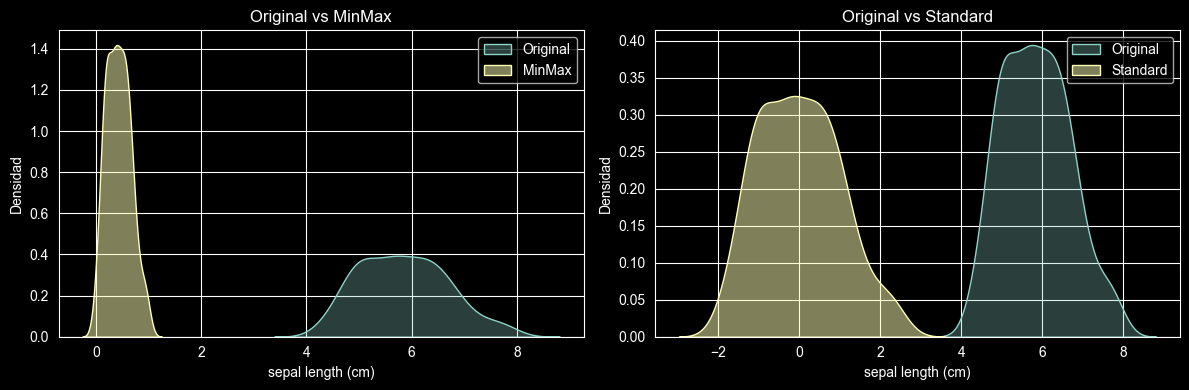

In [11]:
# 2. Grafica distribucion de sepal length antes y despues del escalado

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# cargar datos si no existen
try:
    data
except:
    iris = load_iris(as_frame=True)
    data = iris.frame.drop(columns=['target'])

col = 'sepal length (cm)'

# escaladores
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)
data_standard = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

plt.figure(figsize=(12, 4))

# original vs minmax
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x=col, label='Original', fill=True, alpha=0.3)
sns.kdeplot(data=data_minmax, x=col, label='MinMax', fill=True, alpha=0.5)
plt.title('Original vs MinMax')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()

# original vs standard
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x=col, label='Original', fill=True, alpha=0.3)
sns.kdeplot(data=data_standard, x=col, label='Standard', fill=True, alpha=0.5)
plt.title('Original vs Standard')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Crea una gráfica de dispersión entre 'sepal length (cm)' y 'sepal width (cm)' con los datos escalados por StandardScaler.

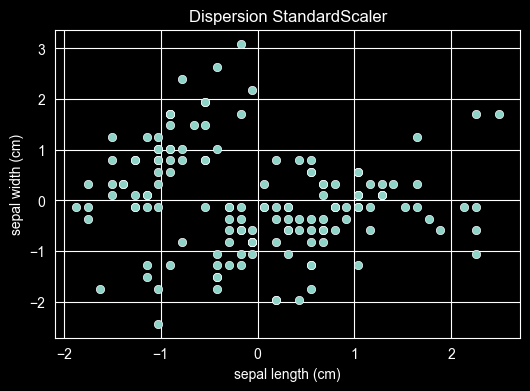

In [12]:
# 3. Grafica dispersion con datos escalados (StandardScaler)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# escalar datos
scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=data_std, x='sepal length (cm)', y='sepal width (cm)')
plt.title('Dispersion StandardScaler')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### 4. ¿Qué técnica de escalado crees que es más adecuada para este conjunto de datos? ¿Por qué?

In [21]:
# Para saber la tecnica de escalado mas adecuada, utilizaremos CV para comparar el rendimiento entre ambos escalados
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000)

pipe_std = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
pipe_mm  = Pipeline([('scaler', MinMaxScaler()), ('clf', clf)])

score_std = cross_val_score(pipe_std, data, iris.target, cv=5, scoring='accuracy').mean()
score_mm  = cross_val_score(pipe_mm,  data, iris.target, cv=5, scoring='accuracy').mean()

print('accuracy Standard:', score_std)
print('accuracy MinMax  :', score_mm)
print("El modelo con mayor resultado es el que tiene mejor desempenio")
print("MinMaxScaler es el mejor" if score_mm > score_std else "StandardScaler es el mejor")

El modelo con mayor resultado es el que tiene mejor desempenio
StandardScaler es el mejor
